# STEP 1: Set up your reproducible workflow

### Import Python libraries

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>In the imports cell, we’ve included a number of packages that you
will need. Add imports for packages that will help you:</p>
<ol type="1">
<li>Work with tabular data</li>
<li>Work with geospatial vector data</li>
</ol></div></div>

In [3]:
import os
import pathlib
import geopandas as gpd
import pandas as pd

### Create a folder for your data

For this challenge, you will need to save some data to the computer
you’re working on. We suggest saving to somewhere in your *home* folder
(e.g. `/home/username`), rather than to your GitHub repository, since
data files can easily become too large for GitHub.

> **Warning**
>
> The **home** directory is different for every user! Your home
> directory probably won’t exist on someone else’s computer. Make sure
> to use code like `pathlib.Path.home()` to compute the home directory
> on the computer the code is running on. This is key to writing
> reproducible and interoperable code.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Create a project folder</div></div><div class="callout-body-container callout-body"><p>The code below will help you get started with making a project
directory</p>
<ol type="1">
<li>Replace <code>'your-project-directory-name-here'</code> and
<code>'your-gbif-data-directory-name-here'</code> with
<strong>descriptive</strong> names</li>
<li>Run the cell</li>
<li>(OPTIONAL) Check in the terminal that you created the directory
using the command <code>ls ~/earth-analytics/data</code></li>
</ol></div></div>

In [2]:
# Create data directory in the home folder
data_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    # Earth analytics data directory
    'earth-analytics',
    'data',
    # Project directory
    'species-distribution',
)
os.makedirs(data_dir, exist_ok=True)

## STEP 2: Define your study area – the ecoregions of North America

Track observations of Taciyagnunpa across different **ecoregions**! You
should be able to see changes in the number of observations in each
ecoregion throughout the year.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>The ecoregion data will be available as a <strong>shapefile</strong>.
Learn more about shapefiles and vector data in this <a
href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-vector-data/">Introduction
to Spatial Vector Data File Formats in Open Source Python</a></p></div></div>

### Download and save ecoregion boundaries

The ecoregion boundaries take some time to download – they come in at
about 150MB. To use your time most efficiently, we recommend **caching**
the ecoregions data on the machine you’re working on so that you only
have to download once. To do that, we’ll also introduce the concept of
**conditionals**, or code that adjusts what it does based on the
situation.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>Read more about conditionals in this <a
href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/write-efficient-python-code/conditional-statements/">Intro
Conditional Statements in Python</a></p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Get ecoregions boundaries</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Find the URL for for the ecoregion boundary
<strong>Shapefile</strong>. You can <a
href="https://www.geographyrealm.com/terrestrial-ecoregions-gis-data/">get
ecoregion boundaries from Google.</a>.</li>
<li>Replace <code>your/url/here</code> with the URL you found, making
sure to format it so it is easily readable. Also, replace
<code>ecoregions_dirname</code> and <code>ecoregions_filename</code>
with descriptive and machine-readable names for your project’s file
structure.</li>
<li>Change all the variable names to <strong>descriptive</strong>
variable names, making sure to correctly reference variables you created
before.</li>
<li>Run the cell to download and save the data.</li>
</ol></div></div>

In [4]:
# Set up the ecoregion boundary URL
ecoregions_url = "https://storage.googleapis.com/teow2016/Ecoregions2017.zip"

# Set up a path to save the data on your machine
ecoregions_dir = os.path.join(data_dir, 'wwf_ecoregions')

# Make the ecoregions directory
os.makedirs(ecoregions_dir, exist_ok=True)

# Join ecoregions shapefile path
ecoregions_path = os.path.join(ecoregions_dir, 'wwf_ecoregions.shp')

# Only download once
if not os.path.exists(ecoregions_path):
    ecoregions_gdf = gpd.read_file(ecoregions_url)
    ecoregions_gdf.to_file(ecoregions_path)

Let’s check that that worked! To do so we’ll use a **bash** command
called `find` to look for all the files in your project directory with
the `.shp` extension:

In [5]:
%%bash
find ~/earth-analytics/data/species-distribution -name '*.shp' 

/home/jovyan/earth-analytics/data/species-distribution/wwf_ecoregions/wwf_ecoregions.shp


> **Tip**
>
> You can also run bash commands in the terminal!

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>Learn more about bash in this <a
href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/open-reproducible-science/bash/">Introduction
to Bash</a></p></div></div>

### Load the ecoregions into Python

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Load ecoregions into Python</div></div><div class="callout-body-container callout-body"><p>Download and save ecoregion boundaries from the EPA:</p>
<ol type="1">
<li>Replace <code>a_path</code> with the path your created for your
ecoregions file.</li>
<li>(optional) Consider renaming and selecting columns to make your
<code>GeoDataFrame</code> easier to work with. Many of the same methods
you learned for <code>pandas</code> <code>DataFrame</code>s are the same
for <code>GeoDataFrame</code>s!</li>
<li>Make a quick plot with <code>.plot()</code> to make sure the
download worked.</li>
<li>Run the cell to load the data into Python</li>
</ol></div></div>

<Axes: >

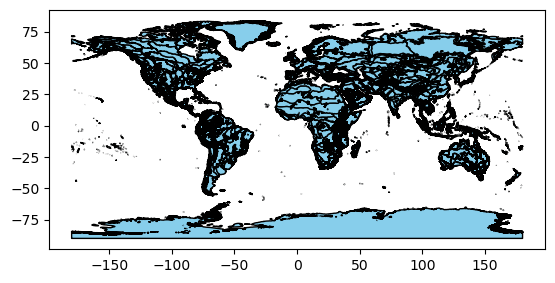

In [6]:
# Open up the ecoregions boundaries
ecoregions_gdf = (
    gpd.read_file(ecoregions_path)
    .rename(columns={
        'ECO_NAME': 'name',
        'SHAPE_AREA': 'area'})
    [['name', 'area', 'geometry']]
)

# Name the index so it will match the other data later on
ecoregions_gdf.index.name = 'ecoregion'

# Plot the ecoregions to check download
ecoregions_gdf.plot(edgecolor='black', color='skyblue')

## STEP 3: Download species observation data

For this challenge, you will use a database called the [Global
Biodiversity Information Facility (GBIF)](https://www.gbif.org/). GBIF
is compiled from species observation data all over the world, and
includes everything from museum specimens to photos taken by citizen
scientists in their backyards. We’ve compiled some sample data in the
same format that you will get from GBIF.

### Download sample data

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import GBIF Data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Define the <code>gbif_url</code>. You can get sample data from
https://github.com/cu-esiil-edu/esiil-learning-portal/releases/download/data-release/species-distribution-foundations-data.zip</li>
<li>Using the ecoregions code, modify the code cell below so that the
download only runs once, as with the ecoregion data.</li>
<li>Run the cell</li>
</ol></div></div>

In [7]:
# Define the download URL
gbif_url = (
    "https://github.com/cu-esiil-edu/esiil-learning-portal/releases/download"
    "/data-release/species-distribution-foundations-data.zip")

# Set up a path to save the data on your machine
gbif_dir = os.path.join(data_dir, 'gbif_veery')
os.makedirs(gbif_dir, exist_ok=True)
gbif_path = os.path.join(gbif_dir, 'gbif_veery.zip')

# Only download once
if not os.path.exists(gbif_path):
    # Load the GBIF data
    gbif_df = pd.read_csv(
        gbif_url, 
        delimiter='\t',
        index_col='gbifID',
        usecols=['gbifID', 'decimalLatitude', 'decimalLongitude', 'month'])
    # Save the GBIF data
    gbif_df.to_csv(gbif_path, index=False)

gbif_df = pd.read_csv(gbif_path)
gbif_df.head()

,decimalLatitude,decimalLongitude,month
0,40.771550,-73.97248,9
1,42.588123,-85.44625,5
2,43.703064,-72.30729,5
3,48.174270,-77.73126,7
4,42.544277,-72.44836,5


### Convert the GBIF data to a GeoDataFrame

To plot the GBIF data, we need to convert it to a `GeoDataFrame` first.
This will make some special geospatial operations from `geopandas`
available, such as spatial joins and plotting.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Convert `DataFrame` to `GeoDataFrame`</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Replace <code>your_dataframe</code> with the name of the
<code>DataFrame</code> you just got from GBIF</li>
<li>Replace <code>longitude_column_name</code> and
<code>latitude_column_name</code> with column names from your
`DataFrame</li>
<li>Run the code to get a <code>GeoDataFrame</code> of the GBIF
data.</li>
</ol></div></div>

In [8]:
gbif_gdf = (
    gpd.GeoDataFrame(
        gbif_df, 
        geometry=gpd.points_from_xy(
            gbif_df.decimalLongitude, 
            gbif_df.decimalLatitude), 
        crs="EPSG:4326")
    # Select the desired columns
    [['month', 'geometry']]
)
gbif_gdf

,month,geometry
0,9,POINT (-73.97248 40.77155)
1,5,POINT (-85.44625 42.58812)
2,5,POINT (-72.30729 43.70306)
3,7,POINT (-77.73126 48.17427)
4,5,POINT (-72.44836 42.54428)
...,...,...
162770,5,POINT (-78.75946 45.09540)
162771,7,POINT (-88.02331 48.99255)
162772,5,POINT (-72.79677 43.46352)
162773,6,POINT (-81.32435 46.04416)


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Make sure to store the new version of your <code>DataFrame</code> for
other notebooks!</p>
<div id="70111aa5" class="cell" data-execution_count="15">
<div class="sourceCode" id="cb1"><pre
class="sourceCode python cell-code"><code class="sourceCode python"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a><span class="op">%</span>store ecoregions_gdf gbif_gdf</span></code></pre></div>
</div></div></div>

In [9]:
%store ecoregions_gdf gbif_gdf

Stored 'ecoregions_gdf' (GeoDataFrame)
Stored 'gbif_gdf' (GeoDataFrame)
